# Pytorch 🔥

Introduction to pytorch

This notebook is assembled from these sources:
- [practical-dl seminar](https://github.com/yandexdataschool/Practical_DL/blob/fall21/week02_autodiff/seminar_pytorch.ipynb)
- [hse dl-course homework](https://github.com/aosokin/dl_cshse_ami/blob/master/2021-fall/homeworks_small/shw2/DL21-fall-shw2.ipynb)
- [nyu dl course tensor tutorial](https://github.com/Atcold/pytorch-Deep-Learning/blob/master/01-tensor_tutorial.ipynb)
- [nyu dl course autograd tutorial](https://github.com/Atcold/pytorch-Deep-Learning/blob/master/03-autograd_tutorial.ipynb)
- [pytorch docs](https://pytorch.org/docs/stable/)

In [1]:
!nvidia-smi | head -n 3

Wed Feb 23 21:15:08 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |


In [2]:
!which python
!python -V

/usr/local/bin/python
Python 3.7.12


Installing pytorch (easier then ever):

- Better use virtualenv ([conda](https://docs.conda.io/en/latest/miniconda.html) **is ok**)
- `pip3 install torch==1.10.2+cu113 torchvision==0.11.3+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html` (https://pytorch.org/get-started/locally/)

In [2]:
import torch
torch.__version__

'1.10.0+cu111'

## Basics:

Jupyter lifehacks:

In [ ]:
torch.sq  # <Tab>

In [5]:
# What about all `*Tensor`s?
# Press <esc> to get out of help
torch.*Tensor?

In [6]:
torch.nn.Module()  # <Shift>+<Tab>

Module()

In [9]:
# Annotate your functions / classes!
torch.nn.Module?

In [10]:
torch.nn.Module??

### Tensor class

In [11]:
# Generate a tensor of size 2x3x4
t = torch.Tensor(2, 3, 4)
type(t)

torch.Tensor

In [13]:
# Get the size of the tensor
t.size()

torch.Size([2, 3, 4])

In [14]:
# t.size() is a classic tuple =>
print('t size:', ' \u00D7 '.join(map(str, t.size())))

t size: 2 × 3 × 4


In [15]:
# prints dimensional space and sub-dimensions
print(f'point in a {t.numel()} dimensional space')
print(f'organised in {t.dim()} sub-dimensions')

point in a 24 dimensional space
organised in 3 sub-dimensions


In [16]:
t

tensor([[[1.9930e-17, 3.0704e-41, 7.0065e-44, 7.0065e-44],
         [6.3058e-44, 6.7262e-44, 7.0065e-44, 6.3058e-44],
         [7.0065e-44, 7.1466e-44, 1.1771e-43, 7.0065e-44]],

        [[6.8664e-44, 8.1275e-44, 7.0065e-44, 6.8664e-44],
         [8.1275e-44, 7.4269e-44, 7.0065e-44, 6.4460e-44],
         [7.8473e-44, 7.0065e-44, 7.7071e-44, 7.5670e-44]]])

In [17]:
# Mind the underscore!
# Any operation that mutates a tensor in-place is post-fixed with an _.
# For example: x.copy_(y), x.t_(), x.random_(n) will change x.
t.random_(10)

tensor([[[8., 8., 0., 2.],
         [2., 5., 4., 0.],
         [3., 0., 7., 7.]],

        [[0., 2., 6., 9.],
         [6., 8., 4., 1.],
         [6., 5., 2., 7.]]])

In [18]:
t

tensor([[[8., 8., 0., 2.],
         [2., 5., 4., 0.],
         [3., 0., 7., 7.]],

        [[0., 2., 6., 9.],
         [6., 8., 4., 1.],
         [6., 5., 2., 7.]]])

In [19]:
# This resizes the tensor permanently 
r = torch.Tensor(t)
r.resize_(3, 8)
r

tensor([[8., 8., 0., 2., 2., 5., 4., 0.],
        [3., 0., 7., 7., 0., 2., 6., 9.],
        [6., 8., 4., 1., 6., 5., 2., 7.]])

In [20]:
# As you can see zero_ would replace r with 0's which was originally filled with integers
r.zero_()

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [21]:
t

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [22]:
# This *is* important, sigh...
s = r.clone()

In [23]:
# In-place fill of 1's
s.fill_(1)
s

tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

In [24]:
# Because we cloned r, even though we did an in-place operation, this doesn't affect r
r

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

### Vectors and matrices

In [25]:
# Creates a 1D tensor of integers 1 to 4
v = torch.Tensor([1, 2, 3, 4])
v

tensor([1., 2., 3., 4.])

In [28]:
# Print number of dimensions (1D) and size of tensor
print(f'dim: {v.dim()}, size: {v.size()[0]}')

dim: 1, size: 4


In [29]:
w = torch.Tensor([1, 0, 2, 0])
w

tensor([1., 0., 2., 0.])

In [30]:
# Element-wise multiplication
v * w

tensor([1., 0., 6., 0.])

In [31]:
# Scalar product: 1*1 + 2*0 + 3*2 + 4*0
v @ w

tensor(7.)

In [32]:
# In-place replacement of random number from 0 to 10
x = torch.Tensor(5).random_(10)
x

tensor([6., 8., 8., 7., 9.])

In [ ]:
print(f'first: {x[0]}, last: {x[-1]}')

first: 3.0, last: 7.0


In [33]:
# Extract sub-Tensor [from:to)
x[1:2 + 1]

tensor([8., 8.])

In [34]:
# But :.(
x[::-1]

ValueError: ignored

In [35]:
v

tensor([1., 2., 3., 4.])

In [36]:
# Create a tensor with integers ranging from 1 to 5, excluding 5
v = torch.arange(1, 4 + 1)
v

tensor([1, 2, 3, 4])

In [37]:
# Square all elements in the tensor
print(v.pow(2), v)

tensor([ 1,  4,  9, 16]) tensor([1, 2, 3, 4])


In [38]:
# Create a 2x4 tensor
m = torch.Tensor([[2, 5, 3, 7],
                  [4, 2, 1, 9]])
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [39]:
m.dim()

2

In [40]:
print(m.size(0), m.size(1), m.size(), sep=' -- ')

2 -- 4 -- torch.Size([2, 4])


In [41]:
# Returns the total number of elements, hence num-el (number of elements)
m.numel()

8

In [42]:
# Indexing row 0, column 2 (0-indexed)
m[0][2]

tensor(3.)

In [43]:
# Indexing row 0, column 2 (0-indexed)
m[0, 2]

tensor(3.)

In [44]:
# Indexing column 1, all rows (returns size 2)
m[:, 1]

tensor([5., 2.])

In [45]:
# Indexing column 1, all rows (returns size 2x1)
m[:, [1]]

tensor([[5.],
        [2.]])

In [46]:
# Indexing columns 1 and 3, all rows (returns size 2x2)
m[:, [1,3]]

tensor([[5., 7.],
        [2., 9.]])

In [47]:
# Indexes row 0, all columns (returns 1x4)
m[[0], :]

tensor([[2., 5., 3., 7.]])

In [48]:
# Indexes row 0, all columns (returns size 4)
m[0, :]

tensor([2., 5., 3., 7.])

In [49]:
# Create tensor of numbers from 1 to 5 (excluding 5)
v = torch.arange(1., 4 + 1)
v

tensor([1., 2., 3., 4.])

In [50]:
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [51]:
# Scalar product
m @ v

tensor([49., 47.])

In [52]:
# Calculated by 1*2 + 2*5 + 3*3 + 4*7
m[[0], :] @ v

tensor([49.])

In [53]:
# Calculated by 
m[[1], :] @ v

tensor([47.])

In [54]:
# Add a random tensor of size 2x4 to m
m + torch.rand(2, 4)

tensor([[2.8425, 5.7130, 3.9193, 7.0327],
        [4.7234, 2.2338, 1.7915, 9.5722]])

In [55]:
# Subtract a random tensor of size 2x4 to m
m - torch.rand(2, 4)

tensor([[1.9193, 4.7531, 2.7960, 6.4291],
        [3.0336, 1.2709, 0.4462, 8.2207]])

In [56]:
# Multiply a random tensor of size 2x4 to m
m * torch.rand(2, 4)

tensor([[0.8683, 2.4802, 1.1485, 4.4715],
        [1.5245, 1.6748, 0.0476, 5.7954]])

In [57]:
# Divide m by a random tensor of size 2x4
m / torch.rand(2, 4)

tensor([[22.8416,  5.3446, 15.2163, 40.9522],
        [10.0938,  2.5997,  3.0457, 34.2098]])

In [58]:
m.size()

torch.Size([2, 4])

In [59]:
# Transpose tensor m, which is essentially 2x4 to 4x2
m.t()

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])

In [60]:
# Same as
m.transpose(0, 1)

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])

### Constructors

In [61]:
# Create tensor from 3 to 8, with each having a space of 1
torch.arange(3., 8 + 1)

tensor([3., 4., 5., 6., 7., 8.])

In [64]:
# Create tensor from 5.7 to -2.1 with each having a space of -3
torch.arange(5.7, -2.1, -3)

tensor([ 5.7000,  2.7000, -0.3000])

In [65]:
# returns a 1D tensor of steps equally spaced points between start=3, end=8 and steps=20
torch.linspace(3, 8, 20).view(1, -1)

tensor([[3.0000, 3.2632, 3.5263, 3.7895, 4.0526, 4.3158, 4.5789, 4.8421, 5.1053,
         5.3684, 5.6316, 5.8947, 6.1579, 6.4211, 6.6842, 6.9474, 7.2105, 7.4737,
         7.7368, 8.0000]])

In [66]:
# Create a tensor filled with 0's
torch.zeros(3, 5)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [67]:
# Create a tensor filled with 1's
torch.ones(3, 2, 5)

tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])

In [68]:
# Create a tensor with the diagonal filled with 1
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

### Casting

In [69]:
# Helper to get what kind of tensor types
torch.*Tensor?

In [70]:
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [71]:
# This is basically a 64 bit float tensor
m_double = m.double()
m_double

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]], dtype=torch.float64)

In [72]:
# This creates a tensor of type int8
m_byte = m.byte()
m_byte

tensor([[2, 5, 3, 7],
        [4, 2, 1, 9]], dtype=torch.uint8)

In [73]:
# Move your tensor to GPU device 0 if there is one (first GPU in the system)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
m.to(device)

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]], device='cuda:0')

In [74]:
# Converts tensor to numpy array
m_np = m.numpy()
m_np

array([[2., 5., 3., 7.],
       [4., 2., 1., 9.]], dtype=float32)

In [78]:
# In-place fill of column 0 and row 0 with value -1
m_np[0, 0] = -1
m_np

array([[-1.,  5.,  3.,  7.],
       [ 4.,  2.,  1.,  9.]], dtype=float32)

In [3]:
# Create a tensor of integers ranging from 0 to 4
import numpy as np
n_np = np.arange(5)
n = torch.from_numpy(n_np)
print(n_np, n)

[0 1 2 3 4] tensor([0, 1, 2, 3, 4])


In [80]:
# In-place multiplication of all elements by 2 for tensor n
# Because n is essential n_np, not a clone, this affects n_np
n.mul_(2)
n_np

array([0, 2, 4, 6, 8])

### Named tensors

In [81]:
# To create a named tensor, just pass names for each dim
imgs = torch.randn(1, 2, 2, 3 , names=('N', 'C', 'H', 'W'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1408.)
  


In [82]:
imgs.names

('N', 'C', 'H', 'W')

In [83]:
renamed_imgs = imgs.rename(H='height', W='width')

In [84]:
renamed_imgs

tensor([[[[-1.6179,  1.1473,  0.3722],
          [-0.5861, -1.7460, -1.4972]],

         [[ 0.2988,  0.4934,  0.2080],
          [ 0.8324,  0.6756,  1.1742]]]], names=('N', 'C', 'height', 'width'))

In [85]:
# Names propagate
imgs.abs()

tensor([[[[1.6179, 1.1473, 0.3722],
          [0.5861, 1.7460, 1.4972]],

         [[0.2988, 0.4934, 0.2080],
          [0.8324, 0.6756, 1.1742]]]], names=('N', 'C', 'H', 'W'))

In [87]:
# Adding names to unnamed tensors
tensor = torch.randn(2, 3, 5, 7, 11)
tensor = tensor.refine_names('A', ..., 'B', 'C')
tensor.names

('A', None, None, 'B', 'C')

In [88]:
# Name matching (and how it could be usefull?)
x = torch.randn(3, names=('X',))
y = torch.randn(3)
z = torch.randn(3, names=('Z',))

In [89]:
z + z

tensor([ 0.3729,  1.8866, -2.2701], names=('Z',))

In [90]:
x + y

tensor([1.0829, 1.1155, 1.3544], names=('X',))

In [91]:
x + z

RuntimeError: ignored

In [92]:
# Binary ops unify names 
x = torch.randn(3, 3, names=('N', None))
y = torch.randn(3, 3, names=(None, 'C'))

x * y

tensor([[-0.6437,  1.1387, -0.5718],
        [-0.3071,  1.6796,  2.9370],
        [-1.0344,  0.0996, -0.0404]], names=('N', 'C'))

In [93]:
# Won't work
x = torch.randn(3, 3, names=('N', 'C'))
y = torch.randn(3, names=('N',))

x * y

RuntimeError: ignored

In [94]:
# Also won't work
x = torch.randn(3, 3, names=('N', None))
y = torch.randn(3, names=('N',))

x * y

RuntimeError: ignored

In [95]:
# Explicit align
img = torch.randn(5,3,28,28, names=('N','C','H','W'))
scale = torch.randn(3, names=('C',))


In [96]:
img * scale

RuntimeError: ignored

In [99]:
# No more unsqueeze and [...,None]
img * scale.align_as(img);

In [100]:
# Reorder
img.align_to('H', 'W', ...).names

('H', 'W', 'N', 'C')

In [101]:
# Contract away dims
img.sum(('H', 'W'))

tensor([[-52.0894, -66.3597,  40.2292],
        [ 13.1562,   9.4155,   2.7193],
        [-36.0490,  28.4379,  19.1010],
        [ 10.6800,  -6.3022,  13.9893],
        [ 67.6971,  -8.8826, -24.8487]], names=('N', 'C'))

In [102]:
m = torch.randn(10,10, names=('A', 'B'))
v = torch.randn(10, names=('C',))

In [103]:
# multiply
m @ v

tensor([ 5.9490, -0.5195, -0.5026,  3.1959,  1.0990,  4.2714,  1.1194,  2.2892,
        -3.3042, -3.4456], names=('A',))

In [104]:
# Permute dims and vector multiply
m.t() @ v

tensor([-6.2119, -3.6265,  0.7043,  3.4793, -2.0629,  2.6604,  1.1145,  1.8771,
        -2.0533,  4.9612], names=('B',))

In [105]:
# bmm
x = torch.randn(3, 10, 4, 5, names=('A', 'B', 'C', 'D'))
y = torch.randn(10, 5, 8, names=('B', 'E', 'F'))
z = torch.matmul(x, y)

z.names

('A', 'B', 'C', 'F')

In [106]:
z.shape

torch.Size([3, 10, 4, 8])

**Note:** named tensors are still in development, some operations might not be supported, autograd support is also limited

---

### KNN in pytorch  `[TODO]`

Let's implement knn in pytorch `Tensor`'s

In [5]:
# pip install libzero

     |████████████████████████████████| 46 kB 3.5 MB/s 


In [35]:
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import zero
zero.hardware.free_memory()

In [31]:
@torch.inference_mode()
def knn_classifier(
    train_features, train_labels, test_features, k, 
    T=1, num_chunks=10, num_classes=7
):
    n_test, num_chunks = test_features.shape[0], num_chunks
    n_per_chunk = n_test // num_chunks
    retrieval_one_hot = torch.zeros(k, num_classes).to(train_features.device)

    predictions = []

    for idx in tqdm(range(0, n_test, n_per_chunk)):
        features = test_features[
            idx : min((idx + n_per_chunk), n_test), :
        ]
        batch_size = features.shape[0]
        print(batch_size)

        # calculate the dot product and compute top-k neighbors
        similarity = torch.cdist(features[None], train_features[None]).squeeze()
        distances, indices = similarity.topk(k, largest=False, sorted=True)
        candidates = train_labels.view(1, -1).expand(batch_size, -1)
        retrieved_neighbors = torch.gather(candidates, 1, indices).long()

        retrieval_one_hot.resize_(batch_size * k, num_classes).zero_()
        retrieval_one_hot.scatter_(1, retrieved_neighbors.view(-1, 1), 1)

        distances_transform = (-distances).clone().div_(T).exp_()
        probs = torch.sum(
            torch.mul(
                retrieval_one_hot.view(batch_size, -1, num_classes),
                distances_transform.view(batch_size, -1, 1),
            ),
            1,
        )
        _, p = probs.sort(1, True)
        predictions.append(p.cpu())

        # free memory
        del similarity

    return torch.cat(predictions).to(train_features.device)


def accuracy(inputs, targets):
    return ((inputs == targets).sum() / inputs.shape[0]).item()

In [8]:
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer

X, y = fetch_covtype(return_X_y=True)
y -= 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

quantile = QuantileTransformer()

X_train = quantile.fit_transform(X_train)
X_test  = quantile.transform(X_test)

# Convert to torch tensors

X_train = torch.from_numpy(X_train).float()
X_test  = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train).long()
y_test  = torch.from_numpy(y_test).long()

In [9]:
X_train = X_train.to("cuda:0")
X_test  = X_test.to("cuda:0")
y_train = y_train.to("cuda:0")
y_test  = y_test.to("cuda:0")

In [36]:
predictions = knn_classifier(
    X_train, y_train, X_test,
    k=10,
    T=10,
    num_chunks=20
)

  0%|          | 0/21 [00:00<?, ?it/s]

5810
5810
5810
5810
5810
5810
5810
5810
5810
5810
5810
5810
5810
5810
5810
5810
5810
5810
5810
5810
3


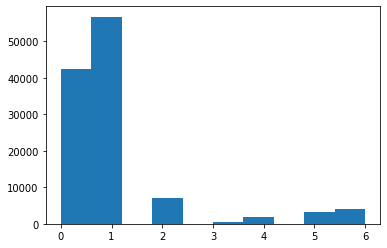

In [37]:
plt.hist(y_test.cpu().numpy());

In [38]:
accuracy(predictions[:,0], y_test)

0.9192792177200317

In [42]:
accuracy(torch.zeros_like(y_test), y_test), accuracy(torch.ones_like(y_test), y_test)

(0.36436235904693604, 0.4886190593242645)

### More:

- *Torch* full API should be read at least once.
Hence, go [here](https://pytorch.org/docs/stable/index.html).
You'll find 100+ `Tensor` operations, including transposing, indexing, slicing, mathematical operations, linear algebra, random numbers, etc are described.
- It's *almost* numpy, but not quite (but people are working on it https://data-apis.org/array-api/latest/purpose_and_scope.html)
- Cool library (einops): https://openreview.net/forum?id=oapKSVM2bcj
- Competition strong! https://github.com/google/jax

---
## Autograd

Basics

In [43]:
# Create a 2x2 tensor with gradient-accumulation capabilities
x = torch.tensor([[1, 2], [3, 4]], requires_grad=True, dtype=torch.float32)
print(x)

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)


Do an operation on the tensor:

In [44]:
# Deduct 2 from all elements
y = x - 2
print(y)

tensor([[-1.,  0.],
        [ 1.,  2.]], grad_fn=<SubBackward0>)


``y`` was created as a result of an operation, so it has a ``grad_fn``.



In [45]:
print(y.grad_fn)

In [46]:
# What's happening here?
print(x.grad_fn)

None


In [47]:
# Let's dig further...
y.grad_fn

In [48]:
y.grad_fn.next_functions

((<AccumulateGrad at 0x7fdf65b94050>, 0), (None, 0))

In [49]:
y.grad_fn.next_functions[0][0]

In [50]:
y.grad_fn.next_functions[0][0].variable

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)

In [51]:
# Do more operations on y
z = y * y * 3
a = z.mean()  # average

print(z)
print(a)

tensor([[ 3.,  0.],
        [ 3., 12.]], grad_fn=<MulBackward0>)
tensor(4.5000, grad_fn=<MeanBackward0>)


In [53]:
# pip install torchviz

  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4150 sha256=2e2a5462c04d32e5c19377cb4679753b0ec07638691c554e9645e796c732c548
  Stored in directory: /root/.cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz


In [54]:
# Let's visualise the computational graph! (thks @szagoruyko)
from torchviz import make_dot

In [55]:
make_dot?

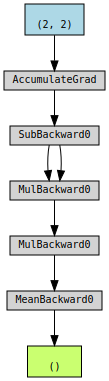

In [56]:
make_dot(a)

### Gradients

Let's backprop now `out.backward()` is equivalent to doing `out.backward(torch.tensor([1.0]))`

In [57]:
# Backprop
a.backward()

Print gradients $\frac{\text{d}a}{\text{d}x}$.




In [58]:
# Compute it by hand BEFORE executing this
print(x.grad)

tensor([[-1.5000,  0.0000],
        [ 1.5000,  3.0000]])


You can do many crazy things with autograd!
> With Great *Flexibility* Comes Great Responsibility

In [59]:
# Dynamic graphs!
x = torch.randn(3, requires_grad=True)

y = x * 2
for i in range(10):
    y = y * 2
print(y)

tensor([ 1390.5510,  -324.0091, -2934.9766], grad_fn=<MulBackward0>)


In [ ]:
# make_dot(y.mean())

In [60]:
# If we don't run backward on a scalar we need to specify the grad_output
gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
y.backward(gradients)

print(x.grad)

tensor([2.0480e+02, 2.0480e+03, 2.0480e-01])


### Inference

In [61]:
# This variable decides the tensor's range below
n = 3

In [62]:
# Both x and w that allows gradient accumulation
x = torch.arange(1., n + 1, requires_grad=True)
w = torch.ones(n, requires_grad=True)
z = w @ x
z.backward()
print(x.grad, w.grad, sep='\n')

tensor([1., 1., 1.])
tensor([1., 2., 3.])


In [63]:
# Only w that allows gradient accumulation
x = torch.arange(1., n + 1)
w = torch.ones(n, requires_grad=True)
z = w @ x
z.backward()
print(x.grad, w.grad, sep='\n')

None
tensor([1., 2., 3.])


In [64]:
# Both x and w that allows gradient accumulation
x = torch.arange(1., n + 1, requires_grad=True)
w = torch.ones(n, requires_grad=True)

# Non leaf node
h = w * x
h.retain_grad()

z = h.sum()
z.backward()
print(x.grad, w.grad, h.grad, sep='\n')

tensor([1., 1., 1.])
tensor([1., 2., 3.])
tensor([1., 1., 1.])


In [65]:
x = torch.arange(1., n + 1)
w = torch.ones(n, requires_grad=True)

# Regardless of what you do in this context, all torch tensors will not have gradient accumulation
with torch.no_grad():
    z = w @ x

try:
    z.backward()  # PyTorch will throw an error here, since z has no grad accum.
except RuntimeError as e:
    print('RuntimeError!!! >:[')
    print(e)

RuntimeError!!! >:[
element 0 of tensors does not require grad and does not have a grad_fn


### More:
- Good blog post on backprop: https://colah.github.io/posts/2015-08-Backprop/
- Advanced, but fun: https://minitorch.github.io/
- Documentation of the automatic differentiation package is at
http://pytorch.org/docs/autograd.

## Linear regression

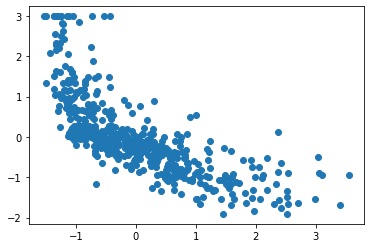

In [66]:
%%capture --no-display
from sklearn.datasets import load_boston
from IPython.display import clear_output

X, y = load_boston(return_X_y=True)

x = (X[:, -1] - X[:, -1].mean()) / X[:, -1].std()
y = (y - y.mean()) / y.std()

plt.scatter(x, y)
plt.show()

In [67]:
# model tensors
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# data tensors
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

for vv in [w, b, x, y]:
    print(vv.is_leaf, vv.requires_grad)

True True
True True
True False
True False


### `[TODO]`

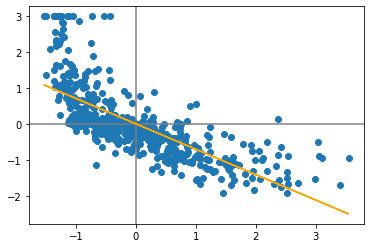

loss =  0.4569062292575836
Done!


In [69]:
for i in tqdm(range(100)):
    
    #compute loss
    y_pred = w * x  + b
    loss = torch.mean((y_pred - y)**2)
    
    # backprop
    loss.backward()

    # gradient descent step for weights
    # take alpha about 0.1

    w.data -= 0.1 * w.grad
    b.data -= 0.1 * b.grad

    
    #zero gradients
    w.grad.zero_()
    b.grad.zero_()
    
    #the rest of code is just bells and whistles
    if (i + 1) % 5==0:
        #draw linear regression prediction vs data
        clear_output(True)
        plt.axhline(0, color='gray')
        plt.axvline(0, color='gray')
        plt.scatter(x.numpy(),y.numpy())
        plt.plot(x.numpy(),y_pred.data.numpy(),color='orange')
        plt.show()

        print("loss = ", loss.item())
        if loss.item() < 0.5:
            print("Done!")
            break

## Higher level APIs

Above we've coded linear regression and basic gradient descent by hand. In practice it becomes cumbersome to manage parameters, their updates when you go beyond linear regression. Pytorch also has high-level api's with common nn building blocks, optimizers, distributed training utils and more. (see [docs](https://pytorch.org/docs/stable/) for examples)

In [70]:
!wget --quiet --show-progress "https://raw.githubusercontent.com/aosokin/dl_cshse_ami/master/2021-fall/homeworks_small/shw2/util.py"

util.py             100%[===================>]   3.06K  --.-KB/s    in 0s      


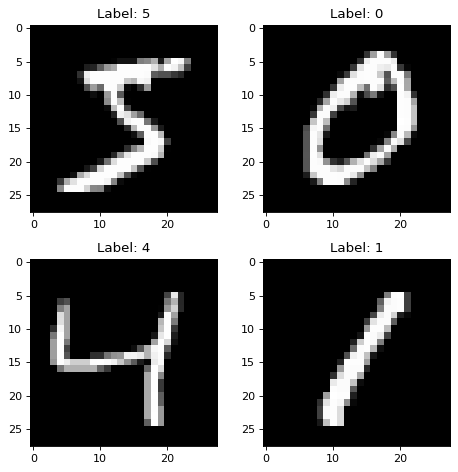

In [71]:
# MNIST again
from util import load_mnist
X_train, y_train, X_val, y_val, X_test, y_test = load_mnist(flatten=True)

fig = plt.figure(figsize=[6, 6], dpi=80)
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.title("Label: %i" % y_train[i])
    plt.imshow(X_train[i].reshape([28, 28]), cmap='gray');
fig.tight_layout()

In [72]:
import torch.nn as nn
import torch.nn.functional as F

In [73]:
class Net(nn.Module):
    def __init__(self, hidden_size=40):
        super(Net, self).__init__()
        # here you construct weights for layers
        self.fc1 = nn.Linear(X_train.shape[1], hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 10)
        
    def forward(self, x):
        # here you describe usage of layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

In [74]:
model = Net()

In [75]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0051, -0.0306,  0.0183,  ...,  0.0251,  0.0317,  0.0025],
         [ 0.0063, -0.0164, -0.0286,  ...,  0.0155,  0.0278,  0.0087],
         [-0.0043,  0.0135,  0.0056,  ...,  0.0040,  0.0029,  0.0333],
         ...,
         [ 0.0289,  0.0201,  0.0187,  ..., -0.0178,  0.0114,  0.0195],
         [ 0.0113,  0.0016,  0.0263,  ...,  0.0081,  0.0022,  0.0092],
         [ 0.0258, -0.0276,  0.0107,  ...,  0.0026,  0.0170, -0.0043]],
        requires_grad=True), Parameter containing:
 tensor([ 0.0116,  0.0045, -0.0286, -0.0335,  0.0265,  0.0265,  0.0137, -0.0146,
         -0.0329, -0.0116, -0.0141, -0.0118,  0.0166, -0.0022,  0.0301, -0.0240,
          0.0287,  0.0054, -0.0223, -0.0255,  0.0106, -0.0265, -0.0044, -0.0251,
          0.0282, -0.0147,  0.0009,  0.0257,  0.0024,  0.0048,  0.0032, -0.0278,
          0.0315, -0.0242, -0.0049,  0.0113,  0.0048,  0.0243, -0.0034,  0.0230],
        requires_grad=True), Parameter containing:
 tensor([[-0.0844,  0.0134, 

In [76]:
from torch.utils.data import TensorDataset, DataLoader

In [77]:
train_ds = TensorDataset(*map(lambda x: torch.from_numpy(x.copy()).to("cuda:0"), [X_train, y_train]))
test_ds = TensorDataset(*map(lambda x: torch.from_numpy(x.copy()).to("cuda:0"), [X_test, y_test]))    

In [78]:
train_dl = DataLoader(train_ds, batch_size=128, shuffle=True, drop_last=True)
test_dl  = DataLoader(test_ds, batch_size=128, shuffle=False)

In [79]:
# Write a train function
def train(model, optimizer, batchsize=32):
    loss_log, acc_log = [], []
        
    model.train()
    for x_batch, y_batch in tqdm(train_dl, leave=False):
        optimizer.zero_grad()
        output = model(x_batch)
        loss = F.cross_entropy(output, y_batch)
        # compute gradients
        loss.backward()
        # make a step
        optimizer.step()

        pred = torch.max(output, 1).indices
        acc = (pred == y_batch).sum() / y_batch.shape[0]
        acc_log.append(acc.item())

        loss = loss.item()
        loss_log.append(loss)
    return loss_log, acc_log


# TODO: write a validation function
@torch.inference_mode()
def test(model):
    loss_log, acc_log = [], []
    model.eval()

    for x_batch, y_batch in tqdm(test_dl, leave=False):
        output = model(x_batch)
        loss = F.cross_entropy(output, y_batch)

        # compute gradients
        loss = loss.item()
        loss_log.append(loss)
        
        pred = torch.max(output, 1).indices
        acc = (pred == y_batch).sum() / y_batch.shape[0]
        acc_log.append(acc.item())

    return loss_log, acc_log


def plot_history(train_history, val_history, title='loss'):
    plt.figure()

    plt.title('{} at {} epoch'.format(title, epoch))
    plt.plot(train_history, label='train', zorder=1)
    
    points = torch.tensor(val_history)
    
    plt.scatter(points[:, 0], points[:, 1], marker='+', s=180, c='orange', label='val', zorder=2)
    plt.xlabel('train steps')
    
    plt.legend(loc='best')
    plt.grid()

    plt.show()

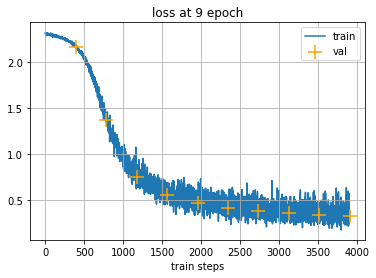

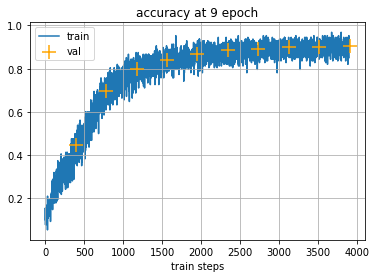

In [80]:
from statistics import mean

train_log, train_acc_log = [],[]
val_log, val_acc_log = [],[]

model = Net().to("cuda:0")
opt = torch.optim.SGD(model.parameters(), lr=0.0005, momentum=0.95)
steps = len(train_ds) / 128

for epoch in range(10):
    train_loss, train_acc = train(model, opt, batch_size=1000)
    val_loss, val_acc = test(model)
    
    # store metrics
    # <your code>
    train_log.extend(train_loss)
    train_acc_log.extend(train_acc)
    
    val_log.append((steps * (epoch + 1), mean(val_loss)))
    val_acc_log.append((steps * (epoch + 1), mean(val_acc)))
    
    # plot all metrics (loss and acc for train/val)
    # <your code>
    clear_output()
    plot_history(train_log, val_log)    
    plot_history(train_acc_log, val_acc_log, title='accuracy')    

### More:

- https://pytorch.org/tutorials/
- https://pytorch.org/ecosystem/
- Pytorch examples - a repo that implements many cool DL models in pytorch - https://github.com/pytorch
- More on new pytorch data-loading - https://github.com/pytorch/data